**Импортируем библиотеки.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

**Загрузим датасеты по очереди**

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

##  Шаг 1. Посмотрим на общую информацию каждого датасета.

### Рассмотрим датасет "calls".

In [3]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


**В датасете "calls" нет пропусков и ошибок в названиях столбцов.**

### Рассмотрим датасет "internet".

In [5]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [6]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


**В датасете "internet" нет ошибок в названиях столбцов и пропусков. Но есть колонка "Unnamed". Это индекс по умолчанию  , образовавшийся при формировании дата-фрейма из источника данных. Избавимся от этой колонки.**

In [7]:
internet.drop(['Unnamed: 0'], axis=1, inplace=True)

In [8]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


### Рассмотрим датасет "messages"

In [9]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [10]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


**В датасете "messages" нет пропусков и ошибок в название колонок.**

### Рассмотрим датасет "tariffs".

In [11]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [12]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


**В датасете "tariffs" нет пропусков, названия колонок соответствуют регистру snake_case.**

### Рассмотрим датасет "users".

In [13]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [14]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


**В датасете "users" есть пропуски в колонке "churn_date" (дата прекращения полльзования тарифом). Данные пропуски означают, что тариф действовал на момент выгрузки данных. Названия колонок соответствуют регистру snake_case.**

### Вывод

1. **Названия всех колонок соответствуют регистру snake_case.**  


2. **В данных нет пропусков, которые потребовалось бы заполнять.**


3. **Формат колонки, содержащий дату необходимо привести к типу datetime64.**


4. **В датасете "internet" при чтение файла образовалась колонка "Unnamed" с индексом по умолчанию. Принял решение избавится от нее на старте.**

## Шаг 2. Подготовка данных.

**Изменим в дата-сетах тип колонок с датой с object на datetime64, а так же добавим столбец с номером месяца в дата-сеты оказанных услуг для удобства рассчета.**

In [15]:
dict_with_column_for_datetime_and_name_of_df = {
    "call_date": calls,
    "session_date": internet,
    "message_date": messages,
    "reg_date": users,
    "churn_date": users
    }

for k, v in dict_with_column_for_datetime_and_name_of_df.items():
    v[k] = pd.to_datetime(v[k], format='%Y-%m-%d')
    v['month'] = pd.to_datetime(v[k], format='%Y-%m-%d').dt.month

### <u>Посчитаем для каждого пользователя по месяцам:</u>

### Количество сделанных звонков и израсходованных минут разговора. Так же будем учитывать, что "Мегалайн" всегда округляет секунды до минут. Звонки, длительность которых равна 0, буду считаться пропущенными, а значит учтивыить их в подсчете не буду.

In [16]:
calls['ceil_duration'] = np.ceil(calls['duration'])

In [17]:
full_df = calls.query('duration != 0').pivot_table(index=["user_id", "month"], values=['call_date','ceil_duration'], aggfunc={'call_date': 'count', 'ceil_duration': 'sum'}).reset_index().rename(columns={'call_date': 'calls_count', 'ceil_duration': 'duration_calls'})

In [18]:
full_df.head()

,user_id,month,calls_count,duration_calls
0,1000,5,17,159.0
1,1000,6,28,172.0
2,1000,7,41,340.0
3,1000,8,42,408.0
4,1000,9,46,466.0


### Количество отправленных сообщений по месяцам.

In [19]:
full_df = full_df.merge(messages.pivot_table(index=['user_id','month'], values='message_date', aggfunc='count'), on=['user_id','month'], how='outer').rename(columns={'message_date': 'sms_count'})

In [20]:
full_df.head()

,user_id,month,calls_count,duration_calls,sms_count
0,1000,5,17.0,159.0,22.0
1,1000,6,28.0,172.0,60.0
2,1000,7,41.0,340.0,75.0
3,1000,8,42.0,408.0,81.0
4,1000,9,46.0,466.0,57.0


### Объем израсходованного интернет-трафика, учитывая, что отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону.(мегабайты до гигабайт)

In [21]:
full_df = full_df.merge(internet.pivot_table(index=['user_id','month'], values='mb_used', aggfunc='sum'), on=['user_id','month'], how='outer')

In [22]:
full_df.head()

,user_id,month,calls_count,duration_calls,sms_count,mb_used
0,1000,5,17.0,159.0,22.0,2253.49
1,1000,6,28.0,172.0,60.0,23233.77
2,1000,7,41.0,340.0,75.0,14003.64
3,1000,8,42.0,408.0,81.0,14055.93
4,1000,9,46.0,466.0,57.0,14568.91


In [23]:
def round_up_to_gb(row):
    val = row['mb_used']
    val -= val % -(2**10)
    val = val / 1024
    return val

full_df['gb_used'] = full_df.apply(round_up_to_gb, axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
full_df.head()

,user_id,month,calls_count,duration_calls,sms_count,mb_used,gb_used
0,1000,5,17.0,159.0,22.0,2253.49,3.0
1,1000,6,28.0,172.0,60.0,23233.77,23.0
2,1000,7,41.0,340.0,75.0,14003.64,14.0
3,1000,8,42.0,408.0,81.0,14055.93,14.0
4,1000,9,46.0,466.0,57.0,14568.91,15.0


**Добавим информацию по тарифам для каждого пользователя.**

In [25]:
full_df = full_df.merge(users[['user_id', 'tariff', 'city']], on=['user_id'], how='outer')

In [26]:
full_df.head()

,user_id,month,calls_count,duration_calls,sms_count,mb_used,gb_used,tariff,city
0,1000,5.0,17.0,159.0,22.0,2253.49,3.0,ultra,Краснодар
1,1000,6.0,28.0,172.0,60.0,23233.77,23.0,ultra,Краснодар
2,1000,7.0,41.0,340.0,75.0,14003.64,14.0,ultra,Краснодар
3,1000,8.0,42.0,408.0,81.0,14055.93,14.0,ultra,Краснодар
4,1000,9.0,46.0,466.0,57.0,14568.91,15.0,ultra,Краснодар


### А теперь помесячную выручку с каждого пользователя. Для этого вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану.

In [27]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 9 columns):
user_id           3216 non-null int64
month             3214 non-null float64
calls_count       3168 non-null float64
duration_calls    3168 non-null float64
sms_count         2717 non-null float64
mb_used           3203 non-null float64
gb_used           3203 non-null float64
tariff            3216 non-null object
city              3216 non-null object
dtypes: float64(6), int64(1), object(2)
memory usage: 251.2+ KB


**Пропуски образовавшиеся при слиянии, означают, что услагами не пользовались. Заполню такие пропуски нулями.**

In [28]:
full_df = full_df.fillna(0)
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 9 columns):
user_id           3216 non-null int64
month             3216 non-null float64
calls_count       3216 non-null float64
duration_calls    3216 non-null float64
sms_count         3216 non-null float64
mb_used           3216 non-null float64
gb_used           3216 non-null float64
tariff            3216 non-null object
city              3216 non-null object
dtypes: float64(6), int64(1), object(2)
memory usage: 251.2+ KB


In [29]:
dct_tariff = tariffs.set_index('tariff_name').to_dict()

def get_total_revenu(row):
    total_revenue = 0
    tariff_name = row['tariff']
    monthly_flee = dct_tariff['rub_monthly_fee'][tariff_name]
    minutes = ((row['duration_calls'] - dct_tariff['minutes_included'][tariff_name])) * dct_tariff['rub_per_minute'][tariff_name]
    sms = (row['sms_count'] - dct_tariff['messages_included'][tariff_name]) * dct_tariff['rub_per_message'][tariff_name]
    gb = (row['gb_used'] - dct_tariff['mb_per_month_included'][tariff_name] / 1024) * dct_tariff['rub_per_gb'][tariff_name]
    for service in [minutes, sms, gb]:
        if service > 0:
            total_revenue += service
    total_revenue +=  monthly_flee
    return total_revenue

full_df['total_revenue'] = full_df.apply(get_total_revenu, axis=1)
    

In [30]:
full_df.head()

,user_id,month,calls_count,duration_calls,sms_count,mb_used,gb_used,tariff,city,total_revenue
0,1000,5.0,17.0,159.0,22.0,2253.49,3.0,ultra,Краснодар,1950.0
1,1000,6.0,28.0,172.0,60.0,23233.77,23.0,ultra,Краснодар,1950.0
2,1000,7.0,41.0,340.0,75.0,14003.64,14.0,ultra,Краснодар,1950.0
3,1000,8.0,42.0,408.0,81.0,14055.93,14.0,ultra,Краснодар,1950.0
4,1000,9.0,46.0,466.0,57.0,14568.91,15.0,ultra,Краснодар,1950.0


**Приведем к целочисленному типу колонки, значения которых равны целому числу.**

In [31]:
l_with_columns = ['user_id', 'month', 'calls_count', 'duration_calls', 'sms_count', 'gb_used', 'total_revenue']

for column in l_with_columns:
    full_df[column] = full_df[column].astype('int')

### Вывод

**Произведены рассчеты для каждого пользователя по месяцам количества сообщений, звонков, длительности телефонного разговора, размера интеренет трафика. Так же было произведено преобразование итогового размера трафика из мегабайт в гигабайты, так как цена в тарифе указывается за гигабайт. В том числе оругление размера итоговой сессии за месяц.**


## Шаг 3. Анализ данных.

### Изучим длительность телефонных разговоров пользователей для обоих тарифов.

In [32]:
df_smart = full_df.query('tariff == "smart"')
df_smart['duration_calls'].describe()

count    2230.000000
mean      417.747534
std       190.476754
min         0.000000
25%       282.000000
50%       421.500000
75%       545.000000
max      1435.000000
Name: duration_calls, dtype: float64

**И так, стандартное отклонение велико, а значит в выборке присутствуют выбросы/аномалии. Медина немного больше среднего, а значит датасет будет иметь небольшой скос влево(отрицательная скошенность).**

In [33]:
df_ultra = full_df.query('tariff == "ultra"')
df_ultra['duration_calls'].describe()

count     986.000000
mean      526.089249
std       317.887549
min         0.000000
25%       282.500000
50%       518.000000
75%       751.750000
max      1673.000000
Name: duration_calls, dtype: float64

**Медиана в тарифе "Ультра" немного меньше среднего, значит дата-сет будет иметь скошенность вправо(положительная скошенность).**

**Рассчитаем среднее, дисперсию и стандартное отклонение для каждого тарифа.
Далее построим гистограммы , в качестве метода будем использовать distplot() библиотеки seaborn. Seaborn содержит более адекватные дефолтные настройки оформления графиков.**

In [34]:
smart_call_dev = np.std(df_smart['duration_calls'], ddof=1) # Тут и далее буду использовать параметр ddof=1, т.к. рассчитываем по выборке.
smart_call_var = np.var(df_smart['duration_calls'], ddof=1)
smart_call_mean = np.mean(df_smart['duration_calls'])

ultra_call_dev = np.std(df_ultra['duration_calls'], ddof=1)
ultra_call_var = np.var(df_ultra['duration_calls'], ddof=1)
ultra_call_mean = np.mean(df_ultra['duration_calls'])

print(f'Параметры "Смарт": Среднее - {smart_call_mean}, Дисперсия - {smart_call_var}, Стандартное отклонение - {smart_call_dev}')
print()
print(f'Параметры "Ультра": Среднее - {ultra_call_mean}, Дисперсия - {ultra_call_var}, Стандартное отклонение - {ultra_call_dev}')

Параметры "Смарт": Среднее - 417.747533632287, Дисперсия - 36281.39383644458, Стандартное отклонение - 190.4767540579285

Параметры "Ультра": Среднее - 526.0892494929006, Дисперсия - 101052.49354928388, Стандартное отклонение - 317.8875485911392


In [35]:
plt.rcParams["figure.figsize"]=[20,5]

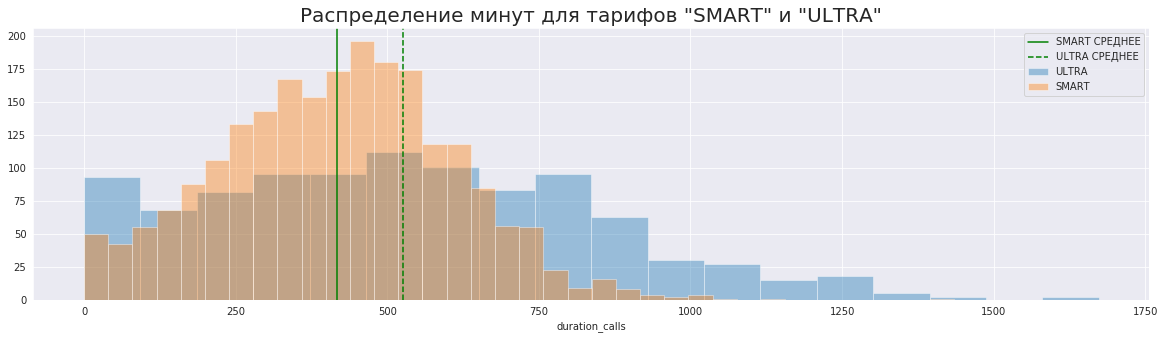

In [36]:
sns.set_style('darkgrid')
plt.title('Распределение минут для тарифов "SMART" и "ULTRA"', fontsize=20)
sns.distplot(df_ultra['duration_calls'], label='ULTRA', kde=False)
sns.distplot(df_smart['duration_calls'], label='SMART', kde=False)
plt.axvline(np.mean(df_smart['duration_calls']),color='g', linestyle='-', label='SMART СРЕДНЕЕ')
plt.axvline(np.mean(df_ultra['duration_calls']),color='g', linestyle='--', label='ULTRA СРЕДНЕЕ')
plt.legend();

**Пользователям тарифа "Смарт" в среднем в месяц требуеться окло 450 минут. График тарифа напоминает колокол, что характерно для нормального распределения. Количетсва базовых минут хватает не всем.**

**Пользователи тарифа "Ультра" в среднем тратят в месяц  около 550 минут.  График напоминает нормальное распределение , но присутствует большой разброс данных. Базового запаса минут хватает всем.**

### Изучим количество отправленных сообщений для пользователей обоих тарифов.

In [37]:
df_smart['sms_count'].describe()

count    2230.000000
mean       33.369058
std        28.230396
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: sms_count, dtype: float64

**Среднее больше медианы, датасет будет иметь положительную скошенность.**

In [38]:
df_ultra['sms_count'].describe()

count    986.000000
mean      49.313387
std       47.806040
min        0.000000
25%        6.000000
50%       38.000000
75%       78.750000
max      224.000000
Name: sms_count, dtype: float64

**Снова медиана меньше среднего, данный датасет тоже будет иметь скошенность вправо.**

In [39]:
smart_sms_dev = np.std(df_smart['sms_count'], ddof=1)
smart_sms_var = np.var(df_smart['sms_count'], ddof=1)
smart_sms_mean = np.mean(df_smart['sms_count'])

ultra_sms_dev = np.std(df_ultra['sms_count'], ddof=1)
ultra_sms_var = np.var(df_ultra['sms_count'], ddof=1)
ultra_sms_mean = np.mean(df_ultra['sms_count'])

print(f'Параметры "Смарт": Среднее - {smart_sms_mean}, Дисперсия - {smart_sms_var}, Стандартное отклонение - {smart_sms_dev}')
print()
print(f'Параметры "Ультра": Среднее - {ultra_sms_mean}, Дисперсия - {ultra_sms_var}, Стандартное отклонение - {ultra_sms_dev}')

Параметры "Смарт": Среднее - 33.36905829596412, Дисперсия - 796.9552557301129, Стандартное отклонение - 28.230395954185852

Параметры "Ультра": Среднее - 49.31338742393509, Дисперсия - 2285.4174246558414, Стандартное отклонение - 47.80603962530092


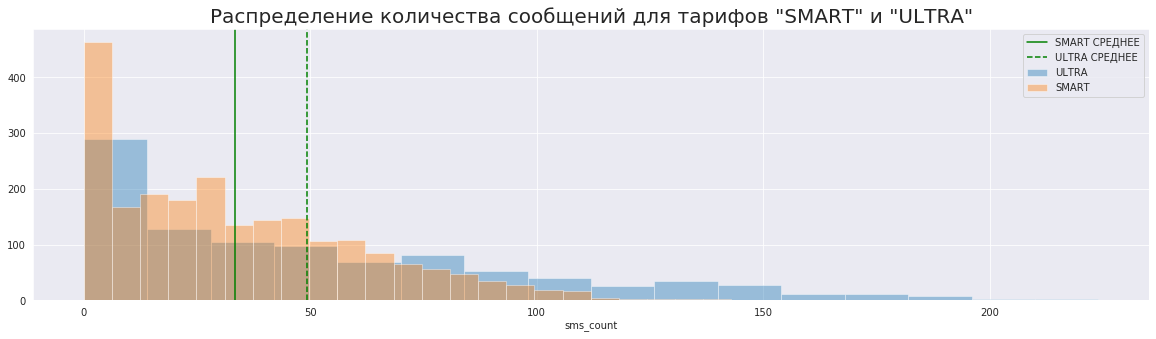

In [40]:
sns.set_style('darkgrid')
plt.title('Распределение количества сообщений для тарифов "SMART" и "ULTRA"', fontsize=20)
sns.distplot(df_ultra['sms_count'], label='ULTRA', kde=False)
sns.distplot(df_smart['sms_count'], label='SMART', kde=False)
plt.axvline(np.mean(df_smart['sms_count']),color='g', linestyle='-', label='SMART СРЕДНЕЕ')
plt.axvline(np.mean(df_ultra['sms_count']),color='g', linestyle='--', label='ULTRA СРЕДНЕЕ')
plt.legend();

**Для обоих тарифов характерно использование не большого количестова смс. Оба графика идут на убыль, пиковые значения: 30 для "Смарт" и 50 для "Ультра". Можно сделать вывод, что данная услуга не пользуется популярностью. Так же есть пики в диапазоне от 0 до 15 , похоже эта группа пользователей практически совсем не пользуется услугой.**

### А теперь рассмотрим объем потраченного пользователями интернет-трафика в каждом тарифе.

In [41]:
df_smart['gb_used'].describe()

count    2230.000000
mean       16.321525
std         5.756167
min         0.000000
25%        13.000000
50%        17.000000
75%        20.000000
max        38.000000
Name: gb_used, dtype: float64

**Все квантили находятся примерно рядом со средним, поэтому стандартное отклонение не велико.**

In [42]:
df_ultra['gb_used'].describe()

count    986.000000
mean      19.474645
std        9.868057
min        0.000000
25%       12.000000
50%       19.000000
75%       27.000000
max       49.000000
Name: gb_used, dtype: float64

**Медиана практически равна среднему, график будет стремится к нормальному распределению.**

**Рассчитаем среднее, дисперсию и стандартное отклонение для каждого тарифа.
Далее построим гистограммы , в качестве метода будем использовать distplot() библиотеки seaborn. Seaborn содержит более адекватные дефолтные настройки оформления графиков.**"

In [43]:
smart_gb_dev = np.std(df_smart['gb_used'], ddof=1)
smart_gb_var = np.var(df_smart['gb_used'], ddof=1)
smart_gb_mean = np.mean(df_smart['gb_used'])

ultra_gb_dev = np.std(df_ultra['gb_used'], ddof=1)
ultra_gb_var = np.var(df_ultra['gb_used'], ddof=1)
ultra_gb_mean = np.mean(df_ultra['gb_used'])

print(f'Параметры "Смарт": Среднее - {smart_gb_mean}, Дисперсия - {smart_gb_var}, Стандартное отклонение - {smart_gb_dev}')
print()
print(f'Параметры "Ультра": Среднее - {ultra_gb_mean}, Дисперсия - {ultra_gb_var}, Стандартное отклонение - {ultra_gb_dev}')

Параметры "Смарт": Среднее - 16.32152466367713, Дисперсия - 33.133453035506285, Стандартное отклонение - 5.7561665225657155

Параметры "Ультра": Среднее - 19.474645030425965, Дисперсия - 97.37854429011234, Стандартное отклонение - 9.868056763624352


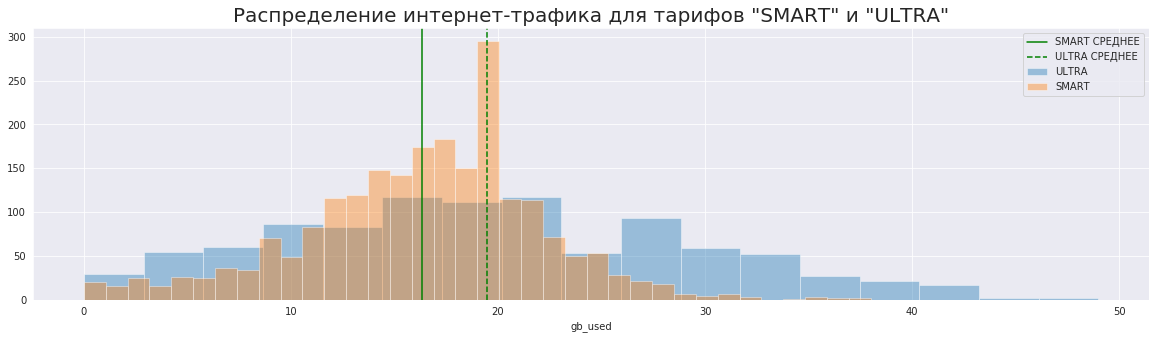

In [44]:
sns.set_style('darkgrid')
plt.title('Распределение интернет-трафика для тарифов "SMART" и "ULTRA"', fontsize=20)
sns.distplot(df_ultra['gb_used'], label='ULTRA', kde=False)
sns.distplot(df_smart['gb_used'], label='SMART', kde=False)
plt.axvline(np.mean(df_smart['gb_used']),color='g', linestyle='-', label='SMART СРЕДНЕЕ')
plt.axvline(np.mean(df_ultra['gb_used']),color='g', linestyle='--', label='ULTRA СРЕДНЕЕ')
plt.legend();

**Для тарифа "Смарт" средний объем интернет-трафика равен 16 гб., а для тарифа "Ультра" - 19 гб. Оба графика имеют примерно нормальное распределение.**

**Можно сделать вывод что далеко не всем пользователям тарифа "Смарт" хватает включенного в тариф пакета гигобайтов. Для пользователей "Ультра" наоборот трафика хватает с остатком.**

### Вывод

**Учитываю полученную выше информацию можно сделать вывод, что для большинства пользователей тарифа "Ультра" в основном хватает базового пакета, и даже не всегда используют его полностью. Пользователи тарифа "Смарт" практически полностью используют все базовые ресурсы, и иногда доплачивают за дополнительные.**

## Шаг 4. Проверка гипотез.

*Нулевая гипотеза (H₀) всегда формируется так, чтобы использовать знак равенства.   
Исходя из формулировки H₀ формуриуется альтернативная гипотеза (H₁). Это утверждение, которое принимается верным, когда отбрасывается нулевая гипотеза.*

*Пороговое значение сделаю равное 5%, как общепринятое.*

<u>*Логика проверки.*</u>

*Вычислю вероятность (p-value) получить наблюдаемое на выборке значение, при условии, что H₀ верна. Если вероятность будет большой (сравним с пороговым значением), то нулевую гипотезу не отвергаем.*



### Проверим гипотезу : "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются".

<u>***Сформируем гипотезу.***</u>

**H₀:  Средняя выручка тарифа "Ультра" равна средней выручке тарифа "Смарт".**

**H₁:  Средняя выручка тарифа "Ультра" и средняя выручка тарифа "Смарт" различаются. Альтернативная гипотеза говорит о проверке равенства средних двух генеральных совокупностей.**

***Выборки по тарифам различатся по размеру, есть сомнения, что дисперсии совокупностей одинаковы. Поэтому в методе ttest_ind укажу параметру equal_var значение False, чтобы посчитать дисперсии выборок по отдельности.***


In [45]:
alpha = .05
res = scipy.stats.ttest_ind(df_smart['total_revenue'], df_ultra['total_revenue'], equal_var=False)

print('\nЗначение p-value: ', res.pvalue)

if res.pvalue < alpha:
    print('\nОтвергаем нулевую гипотезу')
else:
    print('\nНе отвергаем нулевую гипотезу')


Значение p-value:  1.927011394420941e-250

Отвергаем нулевую гипотезу


**Итог проверки: Средние выручки по тарифам не равны.**

### Проверим гипотезу : "Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"

<u>***Сформируем гипотезу.***</u>

**H₀:  Средняя выручка тарифа пользователей из Москвы равна выручке пользователей из других регионов.**

**H₁:  Средняя выручка пользователей из Москвы и средняя выручка пользоватлей из других регионов различаются. Альтернативная гипотеза говорит о проверке равенства средних двух генеральных совокупностей.**

***Выборки по тарифам различатся по размеру, есть сомнения, что дисперсии совокупностей одинаковы. Поэтому в методе ttest_ind укажу параметру equal_var значение False, чтобы посчитать дисперсии выборок по отдельности.***


In [46]:
full_df['city'].unique() # Еще раз проверю названия городов, нет ли опечаток в написании

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Курган', 'Барнаул', 'Красноярск', 'Архангельск', 'Липецк',
       'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Волжский', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [47]:
alpha = .05
res2 = scipy.stats.ttest_ind(full_df.query('city == "Москва"')['total_revenue'], full_df.query('city != "Москва"')['total_revenue'], equal_var=False)

print('\nЗначение p-value:', res2.pvalue)

if res2.pvalue < alpha:
    print('\nОтвергаем нулевую гипотезу')
else:
    print('\nНе отвергаем нулевую гипотезу')


Значение p-value: 0.5216952110000279

Не отвергаем нулевую гипотезу


**Итог проверки: "Выручки не различаются".**

### Вывод.

**Выручки по тарифам разные, а вот места нахождения клиентов практически на выручки по тарифам не влияют.**

## Шаг 5. Общий вывод.

In [48]:
total_revenue_for_smart = df_smart['total_revenue'].sum()
number_of_tariff_users_smart = len(df_smart['user_id'].unique())
total_revenue_for_ultra = df_ultra['total_revenue'].sum()
number_of_tariff_users_ultra = len(df_ultra['user_id'].unique())

In [49]:
print(f'\nВыручка за год по тарифу "Смарт": {total_revenue_for_smart} и количество пользователей: {number_of_tariff_users_smart}')
print(f'\nВыручка за год по тарифу "Ультра": {total_revenue_for_ultra} и количество пользователей: {number_of_tariff_users_ultra}')


Выручка за год по тарифу "Смарт": 2875901 и количество пользователей: 351

Выручка за год по тарифу "Ультра": 2041050 и количество пользователей: 149


In [50]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


**Тариф "Смарт" более популярен, хотя базового пакета хватает не всегда. Плата за дополнительные ресурсы значительно дороже чем в "Ультре", как результат доход "Смарт" приносит больше.**

**Не смотря на то, что в тарифе "Ультра" пользователей почти в два раз меньше и базовый пакет покрывает требования почти большинства, стабильная абонетская плата приносит хороший доход.**

**Наиболее выгоден для компании тариф "Смарт". Стабильная, не высокая абонентская плата, привлекает пользователей, а небольшой базовый пакет услуг провоцирует на дополнительные траты, что приносит значительную прибыль компании.**
